In [1]:
import sys
sys.path.insert(0, "C:\project\ML_PSU\PSU\pythonProject1\metrics")
from BoundingBox import BoundingBox
from BoundingBoxes import BoundingBoxes
from Evaluator import *
from utils import *
import matplotlib.pyplot as plt
from PIL import Image
import os
import pandas as pd
import glob
import shutil
from tqdm.auto import tqdm
from utility import get_iou_yolo, label_yolo_to_csv
IMAGE_SIZE = 1024
PATH_DIR_DETECTED_CSV= r"C:\project\Computer_Vision\term_paper_2023\experiments\antiuav 1024\detection.csv"
PATH_DIR_DETECTED_2_CSV= r"C:\project\Computer_Vision\term_paper_2023\experiments\anti UAV with small drone 1024\detection.csv"
# PATH_DIR_DETECTED_CSV= r"C:\project\Computer_Vision\term_paper_2023\experiments\anti UAV\detection.csv"
# PATH_DIR_DETECTED_2_CSV= r"C:\project\Computer_Vision\term_paper_2023\experiments\Anti UAV with small drone\detection.csv"
# PATH_DIR_DETECTED_3_CSV= r"C:\project\Computer_Vision\term_paper_2023\experiments\Anti UAV+ micro drone\detection.csv"
PATH_DIR_DETECTED_3_CSV= r"C:\project\Computer_Vision\term_paper_2023\experiments\attentiongan_Phantom4_CGI_background_antiUAV_2\detection.csv"

PATH_DIR_DETECTED_4_CSV= r"C:\project\Computer_Vision\term_paper_2023\experiments\attantionGAN_Phantom4_CGI_background_antiUAV_3\v3.1\detection.csv"
PATH_DIR_DETECTED_5_CSV= r"C:\project\Computer_Vision\term_paper_2023\experiments\attantionGAN_Phantom4_CGI_background_antiUAV_3\v3.2\detection.csv"
PATH_GROUND_TRUTH = r"C:\project\Computer_Vision\term_paper_2023\experiments\anti UAV\Anti_UAV_yolo\test\labels"
IOUThreshold = 0.5

In [2]:
def getBoundingBoxesFromCSV(df_detected, df_ground_truth ,image_size=512):
    allBoundingBoxes = BoundingBoxes()
    for i, row in df_detected.iterrows():
         bb = BoundingBox(
                float(row["id_image"]),
                float(row["id_class"]),
                float(row["xc"]),
                float(row["yc"]),
                float(row["w"]),
                float(row["h"]),
                CoordinatesType.Relative,
                (IMAGE_SIZE, IMAGE_SIZE),
                BBType.Detected,
#                 float(  1.0  ),
               float(row["conf"]),
                format=BBFormat.XYWH)
         allBoundingBoxes.addBoundingBox(bb)

    for i, row in df_ground_truth.iterrows():
         bb = BoundingBox(
                float(row["id_image"]),
                float(row["id_class"]),
                float(row["xc"]),
                float(row["yc"]),
                float(row["w"]),
                float(row["h"]),
                CoordinatesType.Relative,
                (IMAGE_SIZE, IMAGE_SIZE),
                BBType.GroundTruth,
                format=BBFormat.XYWH)
         allBoundingBoxes.addBoundingBox(bb)
    return allBoundingBoxes

In [3]:
def analysis(path_predict):
    df_ground_truth = label_yolo_to_csv(r"C:\project\Computer_Vision\term_paper_2023\experiments\anti UAV\Anti_UAV_yolo\test\labels")
    df_detected = pd.read_csv(path_predict)
    df_detected["id_class"] = 0
    boundingboxes = getBoundingBoxesFromCSV(df_detected,df_ground_truth)

    evaluator = Evaluator()

    result = evaluator.PlotPrecisionRecallCurve(
        boundingboxes,  # Object containing all bounding boxes (ground truths and detections)
        IOUThreshold=IOUThreshold,  # IOU threshold
        method=MethodAveragePrecision.EveryPointInterpolation,  # As the official matlab code
        showAP=True,  # Show Average Precision in the title of the plot
        showInterpolatedPrecision=True)
    detections = np.asarray(result[0]["detections"],dtype=object)
    groundTruths = np.asarray(result[0]["groundTruths"],dtype=object)
    TP = np.asarray(result[0]["TP"])
    FP = np.asarray(result[0]["FP"])
    FN = np.asarray(result[0]["FN"])
    area_TP = []
    area_FP = []
    area_FN = []

    for id, gt in enumerate(detections):
        x1 = gt[3][0]
        y1 = gt[3][1]
        x2 = gt[3][2]
        y2 = gt[3][3]
        area = (x2-x1)*(y2-y1)/IMAGE_SIZE/IMAGE_SIZE
        if FP[id] == 1:
            area_FP.append(area)

    for id, gt in enumerate(groundTruths):
        x1 = gt[3][0]
        y1 = gt[3][1]
        x2 = gt[3][2]
        y2 = gt[3][3]
        area = (x2-x1)*(y2-y1)/IMAGE_SIZE/IMAGE_SIZE
        if FN[id] == 1:
            area_FN.append(area)

    df_area_FP = pd.DataFrame(area_FP)
    print("area_FP",df_area_FP.describe())
    df_area_FN= pd.DataFrame(area_FN)
    print("area_FN",df_area_FN.describe())


    # print("precision: ", list(result[0]["precision"]))
    # print("precision",result[0]["precision"])
    # print("recall",result[0]["recall"])



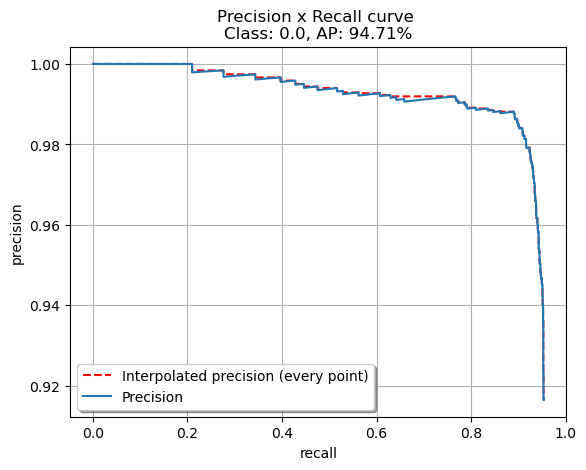

area_FP                 0
count  195.000000
mean     0.013750
std      0.039670
min      0.000024
25%      0.000272
50%      0.000644
75%      0.006223
max      0.266945
area_FN                 0
count  105.000000
mean     0.012779
std      0.031421
min      0.000086
25%      0.000305
50%      0.000885
75%      0.008774
max      0.195127


In [4]:
p1 = analysis(PATH_DIR_DETECTED_CSV)

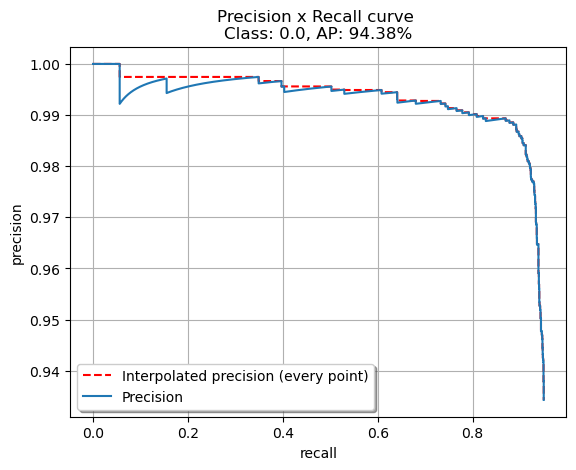

area_FP                 0
count  150.000000
mean     0.013447
std      0.043443
min      0.000061
25%      0.000324
50%      0.000929
75%      0.006135
max      0.410305
area_FN                 0
count  113.000000
mean     0.014759
std      0.034169
min      0.000086
25%      0.000305
50%      0.000828
75%      0.010419
max      0.185606


In [5]:
p2 = analysis(PATH_DIR_DETECTED_2_CSV)

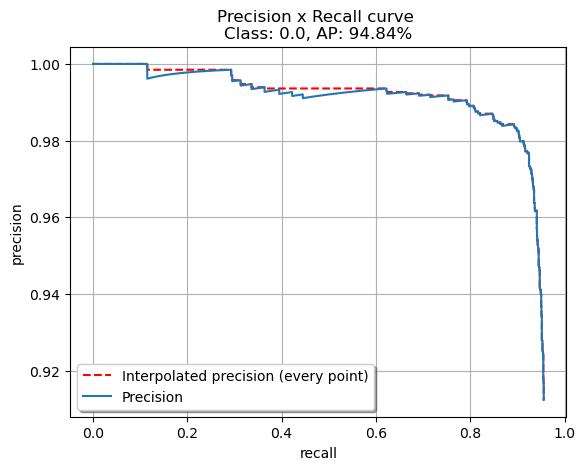

area_FP                 0
count  206.000000
mean     0.022554
std      0.068908
min      0.000023
25%      0.000317
50%      0.001132
75%      0.009364
max      0.621483
area_FN                 0
count  100.000000
mean     0.013891
std      0.036012
min      0.000086
25%      0.000312
50%      0.001116
75%      0.006656
max      0.195127


In [6]:
analysis(PATH_DIR_DETECTED_3_CSV)

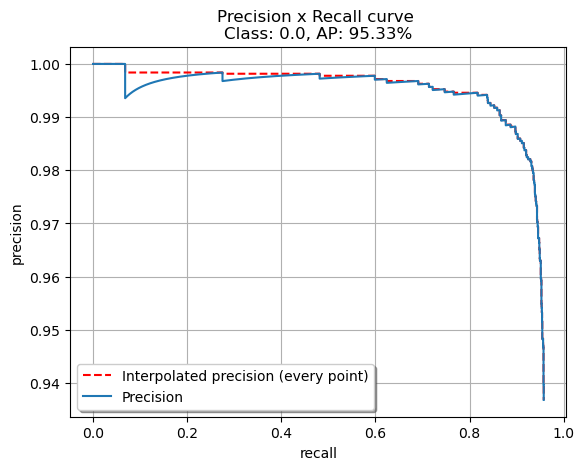

area_FP                 0
count  145.000000
mean     0.026654
std      0.082359
min      0.000040
25%      0.000309
50%      0.000793
75%      0.006096
max      0.506580
area_FN                0
count  96.000000
mean    0.008900
std     0.020467
min     0.000086
25%     0.000283
50%     0.000893
75%     0.006262
max     0.113624


In [7]:
analysis(PATH_DIR_DETECTED_4_CSV)

# plt.hist(area_FN, bins=100)
# plt.show()

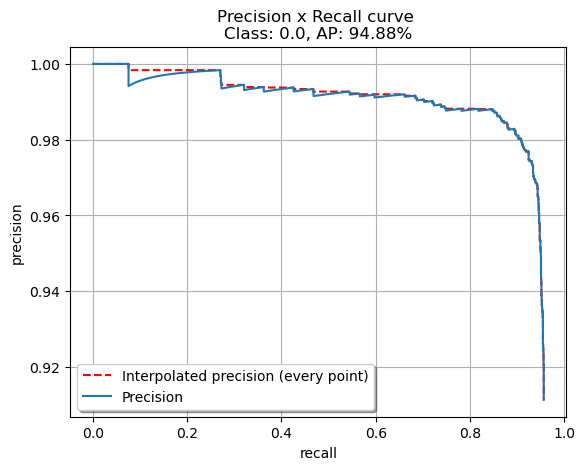

area_FP                 0
count  209.000000
mean     0.033003
std      0.085965
min      0.000046
25%      0.000241
50%      0.001039
75%      0.013580
max      0.522769
area_FN                0
count  98.000000
mean    0.011550
std     0.030644
min     0.000086
25%     0.000286
50%     0.000885
75%     0.006392
max     0.191406


In [8]:
analysis(PATH_DIR_DETECTED_5_CSV)
